# <center>Unraveling the Link between Socioeconomic Status, Cancer Rate, and Drug Poisoning Mortality: A County-Based Investigation<center>


## Background

The United States has been grappling with drug-involved overdose deaths for the past decade. More than 106,000 individuals were reported to die from drug-involved overdose in 2021. Additionally, Cancer has been the second leading cause of death in the United States. Over the past few decades, there has been a drastic increase in early-onset cancer. These two issues may intersect, as cancer patients are sometimes prescribed opioids for pain relief, leading to possible contribuing to dependence and overdose. Disparity in socioeconomic status (SES) of individuals, such as income and education, has been identified as an indicator of drug usage and cancer development. While past studies have examined the variation in regional and county-level SES and the impact on health outcomes, comparison across states are much less common.

## Objectives:
1. Explore influences of socio-economic status (SES) on health outcomes: 1)drug poisoning mortality and 2)cancer rate
2. Develop clusters of counties with similar SES and health outcomes
3. Compare county-level percentile rankings on outcomes within clusters and nationalwide rankings

## Data Source
1. cancer_df: county-level health outcomes and socio-economic data from 2010 to 2016 aggregated from multiple sources such as American Community Survey, clinicaltrails.gov and cancer.gov 
https://www.kaggle.com/datasets/thedevastator/uncovering-trends-in-health-outcomes-and-socioec?resource=download

2. household_df: county-level household size from 2010 to 2016
https://www.kaggle.com/datasets/thedevastator/uncovering-trends-in-health-outcomes-and-socioec?resource=download

3. drug_poisoning_df: NCHS county-level drug poisoning death from 2006 to 2019
https://data.cdc.gov/NCHS/NCHS-Drug-Poisoning-Mortality-by-County-United-Sta/rpvx-m2md


## Import Datatsets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                       
import matplotlib.pyplot as plt             

In [2]:
cancer_df = pd.read_csv('data/cancer_reg.csv', index_col=0)

household_df = pd.read_csv('data/avg-household-size.csv', dtype = {'statefips':'string','countyfips':'string'}, index_col=0)

drug_poisoning_df =  pd.read_csv('data/NCHS_-_Drug_Poisoning_Mortality_by_County__United_States.csv', dtype = {'FIPS':'string','FIPS State':'string'})


In [3]:
drug_poisoning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59584 entries, 0 to 59583
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    59584 non-null  string 
 1   Year                    59584 non-null  int64  
 2   State                   59584 non-null  object 
 3   FIPS State              59584 non-null  string 
 4   County                  59584 non-null  object 
 5   Population              59584 non-null  int64  
 6   Model-based Death Rate  59584 non-null  float64
 7   Standard Deviation      59584 non-null  float64
 8   Lower Confidence Limit  59584 non-null  float64
 9   Upper Confidence Limit  59584 non-null  float64
 10  Urban/Rural Category    59584 non-null  object 
 11  Census Division         59584 non-null  int64  
dtypes: float64(4), int64(3), object(3), string(2)
memory usage: 5.5+ MB


## Data Cleaning

Cleaning household dataset

In [4]:
household_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   string 
 1   countyfips        3220 non-null   string 
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), object(1), string(2)
memory usage: 125.8+ KB


In [5]:
household_cleaned = household_df.copy()

household_cleaned['statefips_pad'] = household_cleaned['statefips'].apply(lambda x: x if len(x) == 2 else '0' + x)
household_cleaned['countyfips_pad'] = household_cleaned['countyfips'].apply(lambda x: x if len(x) ==3 else '0' + x)
household_cleaned['countyfips_pad'] = household_cleaned['countyfips_pad'].apply(lambda x: x if len(x) ==3 else '0' + x)
household_cleaned['FIPS'] = household_cleaned['statefips_pad'] + household_cleaned['countyfips_pad']
household_cleaned.drop(columns = ['statefips','countyfips','statefips_pad','countyfips_pad'],inplace=True)

### Cleaning SES and cancer rate dataset

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [7]:
#Dropping pctsomecol18_24 due to close to 75% missingness
cancer_df.drop(columns = 'pctsomecol18_24', inplace = True)

#Dropping binned income
cancer_df.drop(columns = 'binnedinc', inplace = True)

#rename target_deathrate as deathrate
cancer_df.rename(columns = {'target_deathrate':'deathrate'}, inplace = True)

#the definition of incident rate, studypercap, birhtrate are not clear therefore it will be dropped
cancer_df.drop(columns = ['incidencerate','studypercap','birthrate'], inplace = True)



Create target variable cancer rate in cancer df

In [8]:
#create target variable cancer rate: Number of cancer cases per 100k individuals in each county
cancer_df['target_cancerrate'] = cancer_df['avganncount']/cancer_df['popest2015'] * 100000

/var/folders/cx/rjt4wlwx58lc1gzyjfd5_6v40000gn/T/ipykernel_48929/1923441709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cancer_df.corr()


avganncount  avgdeathsperyear  deathrate  medincome  \
avganncount                 1.000000          0.939408  -0.143532   0.269145   
avgdeathsperyear            0.939408          1.000000  -0.090715   0.223207   
deathrate                  -0.143532         -0.090715   1.000000  -0.428615   
medincome                   0.269145          0.223207  -0.428615   1.000000   
popest2015                  0.926894          0.977634  -0.120073   0.235523   
povertypercent             -0.135694         -0.066918   0.429389  -0.788965   
medianage                  -0.024098         -0.024599   0.004375  -0.013288   
medianagemale              -0.124969         -0.148487  -0.021929  -0.091663   
medianagefemale            -0.122844         -0.144069   0.012048  -0.153278   
percentmarried             -0.106108         -0.181029  -0.266820   0.355123   
pctnohs18_24               -0.143327         -0.136794   0.088463  -0.289383   
pcths18_24                 -0.182054         -0.151418   0.261976  -0.190006   
pctbachdeg18_24             0.284176          0.259761  -0.287817   0.492810   
pcths25_over               -0.311375         -0.295929   0.404589  -0.471348   
pctbachdeg25_over           0.321021          0.293210  -0.485477   0.704928   
pctemployed16_over          0.199459          0.125928  -0.412046   0.693432   
pctunemployed16_over       -0.009016          0.069701   0.378412  -0.453108   
pctprivatecoverage          0.132244          0.056183  -0.386066   0.724175   
pctprivatecoveragealone     0.186045          0.125820  -0.363704   0.788048   
pctempprivcoverage          0.202349          0.160124  -0.267399   0.747294   
pctpubliccoverage          -0.173548         -0.131687   0.404572  -0.754822   
pctpubliccoveragealone     -0.093699         -0.027338   0.449358  -0.719756   
pctwhite                   -0.136501         -0.187159  -0.177400   0.167225   
pctblack                    0.031376          0.084607   0.257024  -0.270232   
pctasian                    0.435071          0.443074  -0.186331   0.425844   
pctotherrace                0.209184          0.215149  -0.189894   0.083635   
pctmarriedhouseholds       -0.106221         -0.160266  -0.293325   0.446083   
target_cancerrate           0.161177         -0.058873  -0.057763   0.029110   

                         popest2015  povertypercent  medianage  medianagemale  \
avganncount                0.926894       -0.135694  -0.024098      -0.124969   
avgdeathsperyear           0.977634       -0.066918  -0.024599      -0.148487   
deathrate                 -0.120073        0.429389   0.004375      -0.021929   
medincome                  0.235523       -0.788965  -0.013288      -0.091663   
popest2015                 1.000000       -0.065299  -0.025219      -0.176608   
povertypercent            -0.065299        1.000000  -0.029280      -0.214001   
medianage                 -0.025219       -0.029280   1.000000       0.129119   
medianagemale             -0.176608       -0.214001   0.129119       1.000000   
medianagefemale           -0.177932       -0.148164   0.124678       0.933696   
percentmarried            -0.160463       -0.642857   0.046372       0.449986   
pctnohs18_24              -0.126582        0.288106   0.006178       0.100486   
pcths18_24                -0.151821        0.094211   0.050574       0.241310   
pctbachdeg18_24            0.248375       -0.387122  -0.016909      -0.034135   
pcths25_over              -0.311849        0.194361   0.036587       0.318277   
pctbachdeg25_over          0.297463       -0.531600  -0.020352      -0.131599   
pctemployed16_over         0.140146       -0.736767  -0.024650      -0.165199   
pctunemployed16_over       0.050768        0.655148   0.018590      -0.142737   
pctprivatecoverage         0.052677       -0.822534   0.004665       0.082232   
pctprivatecoveragealone    0.132660       -0.761672  -0.024272      -0.167064   
pctempprivcoverage         0.158650       -0.683100  -0.036926      -0.208664   
pct

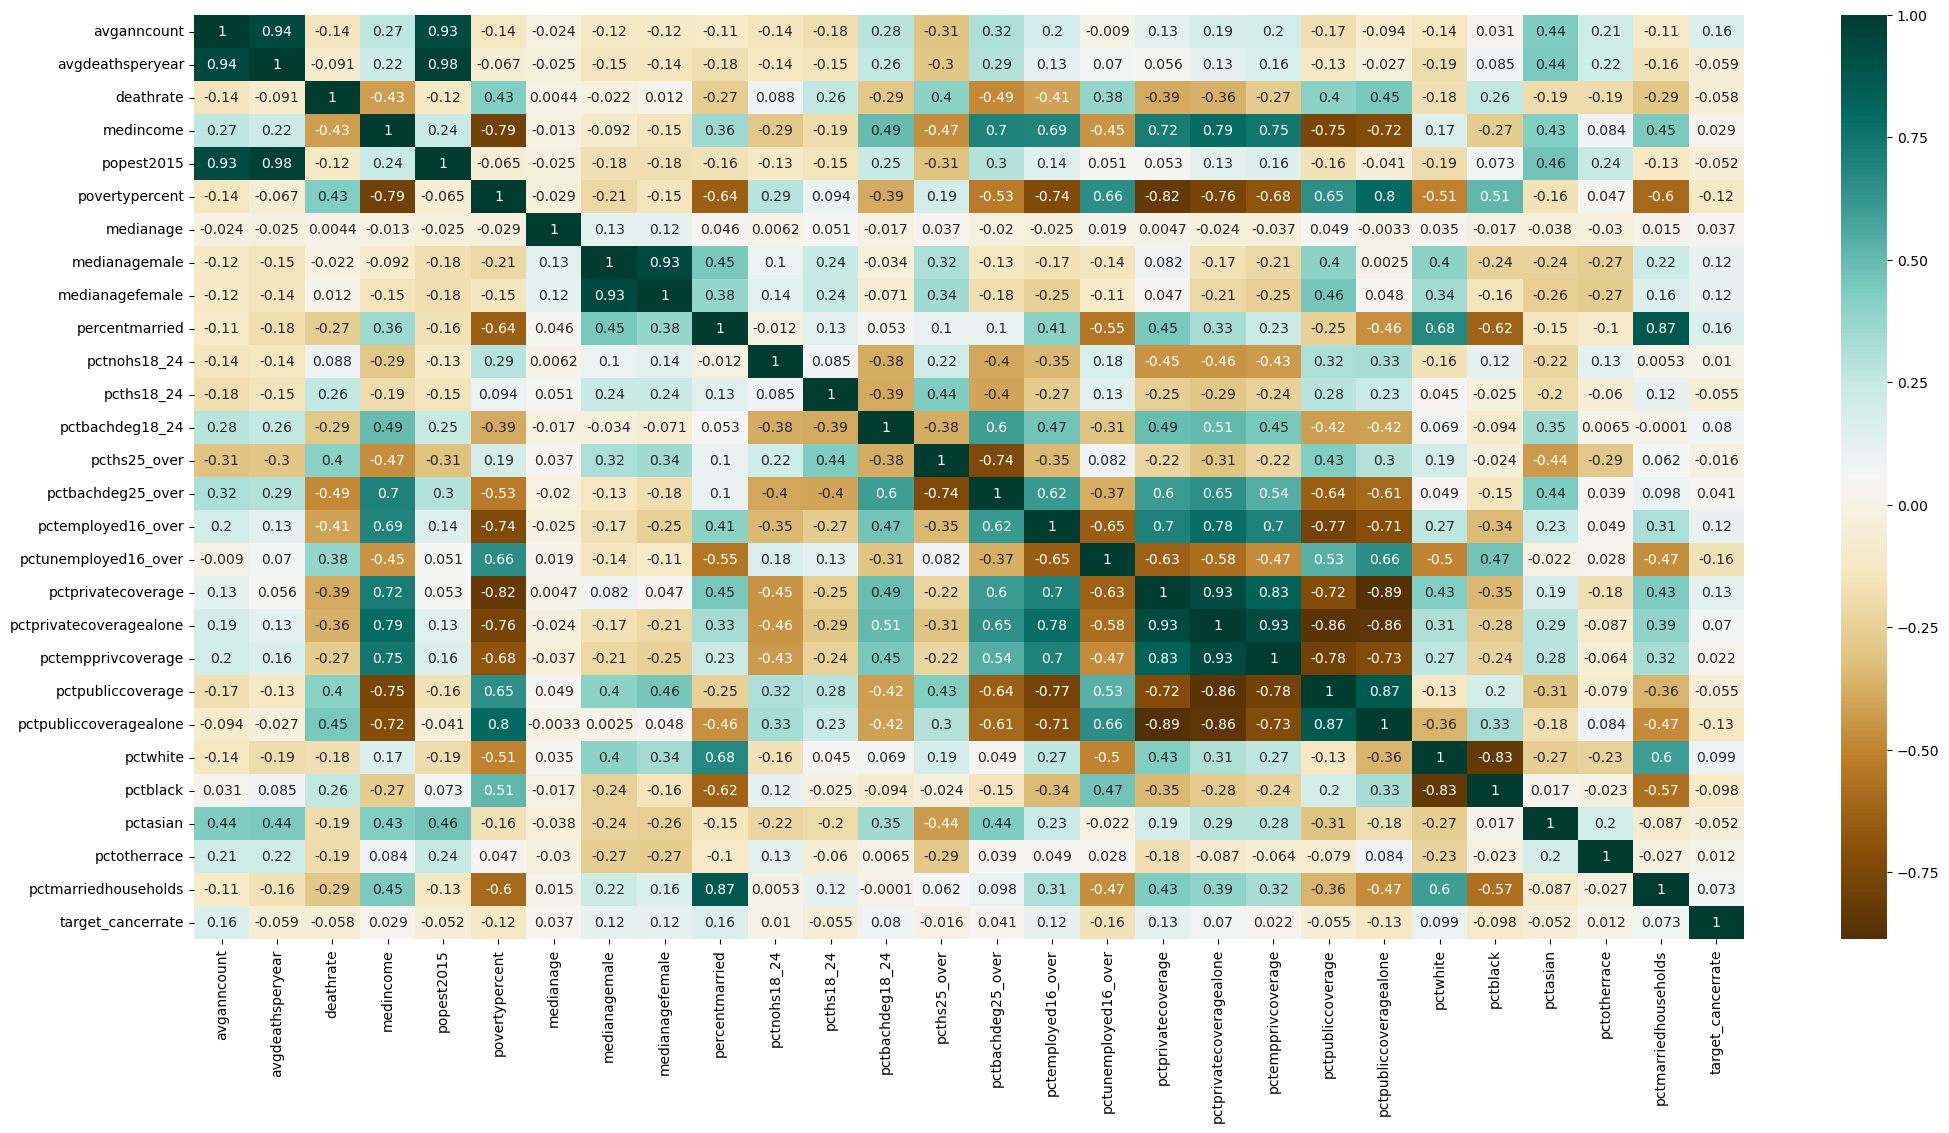

In [9]:
plt.figure(figsize = (25,12))
corr = cancer_df.corr()
sns.heatmap(corr, cmap="BrBG", annot=True)
corr

Based on the correlation heatmap, cancer rate does not demonstrate a significant correlation with any other variables. Income, education, poverty, coverage type and employment level variables are highly correlated with one another, suggestingthe interplay of these factors in SES. Average incident counts and average yearly death rate can be dropped due to strong correlated with population

In [10]:
cancer_df.drop(columns = ['avganncount','avgdeathsperyear'], inplace = True)

#### Cleaning Drug Poisoning Mortality Dataset

In [11]:
drug_poisoning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59584 entries, 0 to 59583
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    59584 non-null  string 
 1   Year                    59584 non-null  int64  
 2   State                   59584 non-null  object 
 3   FIPS State              59584 non-null  string 
 4   County                  59584 non-null  object 
 5   Population              59584 non-null  int64  
 6   Model-based Death Rate  59584 non-null  float64
 7   Standard Deviation      59584 non-null  float64
 8   Lower Confidence Limit  59584 non-null  float64
 9   Upper Confidence Limit  59584 non-null  float64
 10  Urban/Rural Category    59584 non-null  object 
 11  Census Division         59584 non-null  int64  
dtypes: float64(4), int64(3), object(3), string(2)
memory usage: 5.5+ MB


In [12]:
drug_poisoning_df['FIPS'] = drug_poisoning_df['FIPS'].apply(lambda x: x if len(x) == 5 else '0' + x)

In [13]:
#Population and County can be dropped since they are available in the cancer and SES dataset
drug_poisoning_selected = drug_poisoning_df[['FIPS','Year','Model-based Death Rate','Urban/Rural Category','Census Division']]
drug_poisoning_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59584 entries, 0 to 59583
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    59584 non-null  object 
 1   Year                    59584 non-null  int64  
 2   Model-based Death Rate  59584 non-null  float64
 3   Urban/Rural Category    59584 non-null  object 
 4   Census Division         59584 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [14]:
#check to see if there is any unknown/no information entry
drug_poisoning_selected['Census Division'].value_counts()

4    11742
5    11172
7     8930
3     8303
6     6916
8     5263
9     3135
2     2850
1     1273
Name: Census Division, dtype: int64

In [15]:
# filter on year between 2010 to 2016
drug_poisoning_filtered = drug_poisoning_selected[(drug_poisoning_selected['Year'] >= 2010) & (drug_poisoning_selected['Year'] <= 2016)]

#to get unique combinations of FIPS and FIPS state
drug_poisoning_filtered['FIPS'].nunique()

3136

In [16]:
drug_census = drug_poisoning_filtered[['FIPS','Census Division']].drop_duplicates()
drug_rate = drug_poisoning_filtered[['FIPS', 'Model-based Death Rate']]

#get average death rate by county
avg_death_rate = drug_rate.groupby(['FIPS']).mean()['Model-based Death Rate'].reset_index()

drug_bycounty= pd.merge(avg_death_rate, drug_census, how = 'left', 
                  left_on = ['FIPS'], right_on =['FIPS'])

drug_bycounty.rename(columns = {'Model-based Death Rate':'drug_poisoning_mortality'}, inplace = True)

drug_poisoning_cleaned = drug_bycounty.copy()
drug_poisoning_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 0 to 3135
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3136 non-null   object 
 1   drug_poisoning_mortality  3136 non-null   float64
 2   Census Division           3136 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 98.0+ KB


In [17]:
drug_poisoning_cleaned['State'] = drug_poisoning_cleaned['FIPS'].str[:2]

In [18]:
drug_poisoning_cleaned['State'].nunique()

51

In [19]:
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(1,'New England')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(2,'Middle Atlantic')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(3,'East North Central')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(4,'West North Central')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(5,'South Atlantic')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(6,'East South Central')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(7,'West South Central')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(8,'Mountain')
drug_poisoning_cleaned['Census Division'] = drug_poisoning_cleaned['Census Division'].replace(9,'Pacific')

Check for the numbers of unique counties in each dataset

In [20]:
print('Cancer_df unique counties: ', cancer_df['geography'].nunique())
print('household_df unique counties: ', household_cleaned['FIPS'].nunique())
print('drug_poisoning_cleaned unique counties: ', drug_poisoning_cleaned['FIPS'].nunique())

Cancer_df unique counties:  3047
household_df unique counties:  3220
drug_poisoning_cleaned unique counties:  3136


Merge all datasets

In [21]:
merged_data_1 = pd.merge(cancer_df, household_cleaned, how = 'left', on = 'geography')
merged_data = pd.merge(merged_data_1, drug_poisoning_cleaned, how = 'left', on = 'FIPS')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   deathrate                 3047 non-null   float64
 1   medincome                 3047 non-null   int64  
 2   popest2015                3047 non-null   int64  
 3   povertypercent            3047 non-null   float64
 4   medianage                 3047 non-null   float64
 5   medianagemale             3047 non-null   float64
 6   medianagefemale           3047 non-null   float64
 7   geography                 3047 non-null   object 
 8   percentmarried            3047 non-null   float64
 9   pctnohs18_24              3047 non-null   float64
 10  pcths18_24                3047 non-null   float64
 11  pctbachdeg18_24           3047 non-null   float64
 12  pcths25_over              3047 non-null   float64
 13  pctbachdeg25_over         3047 non-null   float64
 14  pctemplo

### Assessing Missing Data and Data Imputation

In [22]:
merged_data[['County','State']] = merged_data.geography.str.split(',', expand = True)

In [23]:
# variables with missingness
var_count = merged_data.count().to_frame().reset_index().rename(columns = {'index':'Variables',0:'Count'})
var_list = var_count[var_count['Count'] < 3047]['Variables'].values.tolist()

In [24]:
var_list

['pctemployed16_over',
 'pctprivatecoveragealone',
 'drug_poisoning_mortality',
 'Census Division']

In [25]:
var_list.remove('Census Division')
#variables can be imputed with state average
var_get_avg = var_list.copy()

In [26]:
def get_avg_by_state(var):
    var_avg = merged_data.groupby(['State'])[[var]].mean().reset_index()
    var_avg.rename(columns ={var:f"{var}_avg_state"}, inplace=True)
    return var_avg

result_dict = {}
for var in var_get_avg:
    result_dict[var] = get_avg_by_state(var)

for df in result_dict.values():
    merged_data = pd.merge(merged_data, df, how = 'left', on = 'State')

In [27]:
#fill in missing values with state average
def impute_with_avg(var,df):
    df[var] = df[var].fillna(df[f"{var}_avg_state"])

for v in var_get_avg:
    impute_with_avg(v,merged_data)


In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   deathrate                           3047 non-null   float64
 1   medincome                           3047 non-null   int64  
 2   popest2015                          3047 non-null   int64  
 3   povertypercent                      3047 non-null   float64
 4   medianage                           3047 non-null   float64
 5   medianagemale                       3047 non-null   float64
 6   medianagefemale                     3047 non-null   float64
 7   geography                           3047 non-null   object 
 8   percentmarried                      3047 non-null   float64
 9   pctnohs18_24                        3047 non-null   float64
 10  pcths18_24                          3047 non-null   float64
 11  pctbachdeg18_24                     3047 no

In [29]:
drop_var_get_avg = ['pctemployed16_over_avg_state',
 'pctprivatecoveragealone_avg_state', 'drug_poisoning_mortality_avg_state']

merged_data.drop(columns = drop_var_get_avg, inplace = True)

In [30]:
# variables with missingness
var_count = merged_data.count().to_frame().reset_index().rename(columns = {'index':'Variables',0:'Count'})
var_count[var_count['Count'] < 3047]['Variables'].values.tolist()

['Census Division']

In [31]:
var_get_mode = ['Census Division']

def get_mode_by_state(var):
    var_mode = merged_data.groupby(['State'])[[var]].agg(lambda x: x.mode()[0]).reset_index()
    var_mode.rename(columns ={var:f"{var}_mode_state"}, inplace=True)
    return var_mode

result_dict = {}
for var in var_get_mode:
    result_dict[var] = get_mode_by_state(var)

for df in result_dict.values():
    merged_data = pd.merge(merged_data, df, how = 'left', on = 'State')

In [32]:
#fill in missing values with state mode for census division
def impute_with_mode(var,df):
    df[var] = df[var].fillna(df[f"{var}_mode_state"])

for v in var_get_mode:
    impute_with_mode(v,merged_data)
    
merged_data.drop(columns = 'Census Division_mode_state', inplace = True)

In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   deathrate                 3047 non-null   float64
 1   medincome                 3047 non-null   int64  
 2   popest2015                3047 non-null   int64  
 3   povertypercent            3047 non-null   float64
 4   medianage                 3047 non-null   float64
 5   medianagemale             3047 non-null   float64
 6   medianagefemale           3047 non-null   float64
 7   geography                 3047 non-null   object 
 8   percentmarried            3047 non-null   float64
 9   pctnohs18_24              3047 non-null   float64
 10  pcths18_24                3047 non-null   float64
 11  pctbachdeg18_24           3047 non-null   float64
 12  pcths25_over              3047 non-null   float64
 13  pctbachdeg25_over         3047 non-null   float64
 14  pctemplo

# Exploratory Data Analysis

In [34]:
merged_data_alys = merged_data.copy()

In [35]:
metadata = merged_data_alys.describe()

#### Checking for outliers

In [36]:
metadata.iloc[:, :20]

deathrate      medincome    popest2015  povertypercent    medianage  \
count  3047.000000    3047.000000  3.047000e+03     3047.000000  3047.000000   
mean    178.664063   47063.281917  1.026374e+05       16.878175    45.272333   
std      27.751511   12040.090836  3.290592e+05        6.409087    45.304480   
min      59.700000   22640.000000  8.270000e+02        3.200000    22.300000   
25%     161.200000   38882.500000  1.168400e+04       12.150000    37.700000   
50%     178.100000   45207.000000  2.664300e+04       15.900000    41.000000   
75%     195.200000   52492.000000  6.867100e+04       20.400000    44.000000   
max     362.800000  125635.000000  1.017029e+07       47.400000   624.000000   

       medianagemale  medianagefemale  percentmarried  pctnohs18_24  \
count    3047.000000      3047.000000     3047.000000   3047.000000   
mean       39.570725        42.145323       51.773679     18.224450   
std         5.226017         5.292849        6.896928      8.093064   
min        22.400000        22.300000       23.100000      0.000000   
25%        36.350000        39.100000       47.750000     12.800000   
50%        39.600000        42.400000       52.400000     17.100000   
75%        42.500000        45.300000       56.400000     22.700000   
max        64.700000        65.700000       72.500000     64.100000   

        pcths18_24  pctbachdeg18_24  pcths25_over  pctbachdeg25_over  \
count  3047.000000      3047.000000   3047.000000        3047.000000   
mean     35.002068         6.158287     34.804660          13.282015   
std       9.069722         4.529059      7.034924           5.394756   
min       0.000000         0.000000      7.500000           2.500000   
25%      29.200000         3.100000     30.400000           9.400000   
50%      34.700000         5.400000     35.300000          12.300000   
75%      40.700000         8.200000     39.650000          16.100000   
max      72.500000        51.800000     54.800000          42.200000   

       pctemployed16_over  pctunemployed16_over  pctprivatecoverage  \
count         3047.000000           3047.000000         3047.000000   
mean            54.180035              7.852412           64.354939   
std              8.189591              3.452371           10.647057   
min             17.600000              0.400000           22.300000   
25%             48.700000              5.500000           57.200000   
50%             54.500000              7.600000           65.100000   
75%             60.286364              9.700000           72.100000   
max             80.100000             29.400000           92.300000   

       pctprivatecoveragealone  pctempprivcoverage  pctpubliccoverage  \
count              3047.000000         3047.000000        3047.000000   
mean                 48.453815           41.196324          36.252642   
std                   9.360569            9.447687           7.841741   
min                  15.700000           13.500000          11.200000   
25%                  42.500000           34.500000          30.900000   
50%                  48.100000           41.100000          36.300000   
75%                  54.900000           47.700000          41.550000   
max                  78.900000           70.700000          65.100000   

       pctpubliccoveragealone  
count             3047.000000  
mean                19.240072  
std                  6.113041  
min                  2.600000  
25%                 14.850000  
50%                 18.800000  
75%                 23.100000  
max                 46.600000

In [37]:
metadata.iloc[:,20:40]

pctwhite     pctblack     pctasian  pctotherrace  \
count  3047.000000  3047.000000  3047.000000   3047.000000   
mean     83.645286     9.107978     1.253965      1.983523   
std      16.380025    14.534538     2.610276      3.517710   
min      10.199155     0.000000     0.000000      0.000000   
25%      77.296180     0.620675     0.254199      0.295172   
50%      90.059774     2.247576     0.549812      0.826185   
75%      95.451693    10.509732     1.221037      2.177960   
max     100.000000    85.947799    42.619425     41.930251   

       pctmarriedhouseholds  target_cancerrate  avghouseholdsize  \
count           3047.000000        3047.000000       3047.000000   
mean              51.243872        2324.429526          2.529682   
std                6.572814       10444.065947          0.248449   
min               22.992490          92.806259          1.860000   
25%               47.763063         480.219707          2.380000   
50%               51.669941         562.355276          2.500000   
75%               55.395132         648.737495          2.640000   
max               78.075397      236751.228468          3.970000   

       drug_poisoning_mortality  
count               3047.000000  
mean                  13.155346  
std                    7.447014  
min                    2.293744  
25%                    7.943808  
50%                   11.559296  
75%                   16.510694  
max                   75.531077

medianage and target_cancerrate show unrealistic outliers. Remove outliers with median age > 100. Average cancer_rate in 2019 is 439 per 100,000 residents according to CDC. Along with the mean, 25% and 75% statistics above, it is justified to remove outliers greater than 1000.

https://www.cdc.gov/cancer/dcpc/data/index.htm#:~:text=In%20the%20United%20States%20in,which%20incidence%20data%20are%20available.

In [38]:
#removing outliers with median age > 100, cancer rate > 1000
merged_data_alys.drop(merged_data_alys[merged_data_alys['medianage'] > 100].index, inplace = True)
merged_data_alys.drop(merged_data_alys[merged_data_alys['target_cancerrate'] > 1000].index, inplace = True)

In [39]:
merged_data_alys['target_cancerrate'].describe()

count    2820.000000
mean      549.827448
std       122.474966
min        92.806259
25%       474.350210
50%       552.697844
75%       627.895791
max       983.606557
Name: target_cancerrate, dtype: float64

In [40]:
numeric_var = merged_data_alys.select_dtypes(exclude = 'object').columns.to_list()

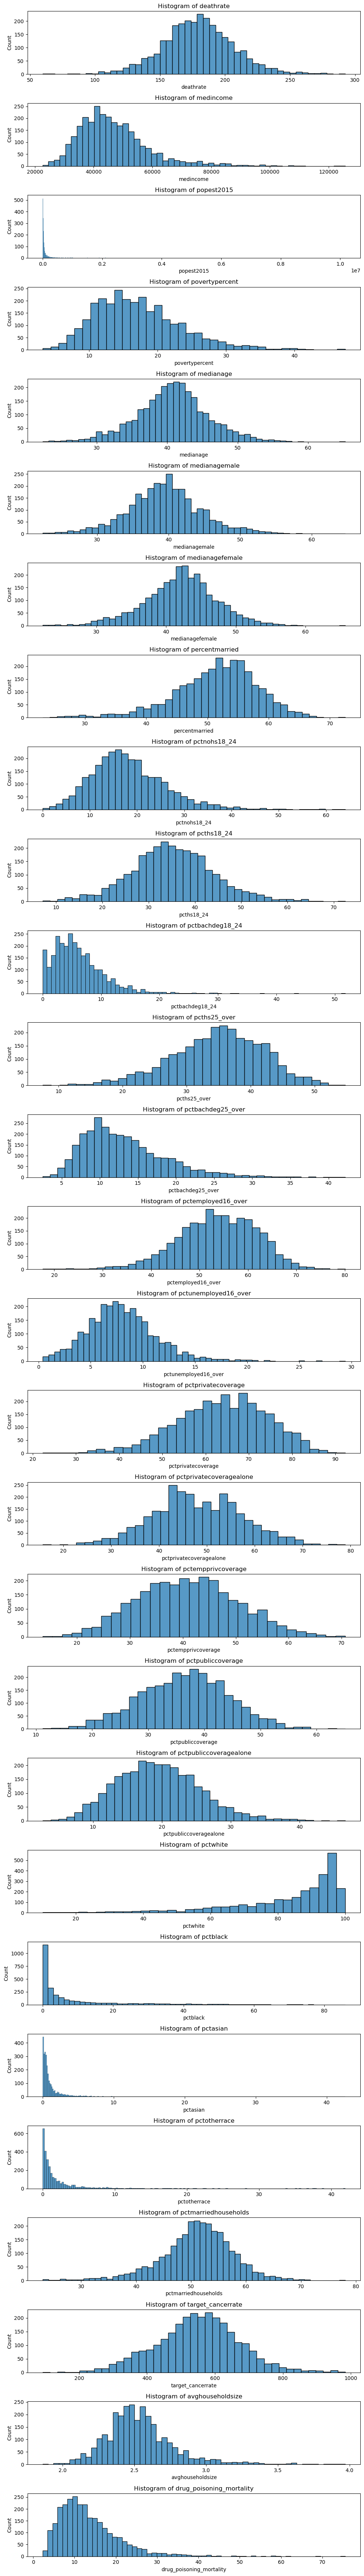

In [41]:
fig, axes = plt.subplots(len(numeric_var), 1, figsize=(10, 70))


for i, col in enumerate(numeric_var):
    sns.histplot(data=merged_data_alys, x=col, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    
plt.tight_layout()
plt.show()

Most variables in the dataset exhibit distributions that closely resemble the normal distribution. However, the distribution of drug poisoning mortality exhibits a right-skew pattern, with a small number of counties experiencing significantly higher rates compared to the rest. Percentage of residents with bachelor degrees also skew toward right. Additionally, a significant majority of counties are predominately inhabited by white residents.

### Let's explore the interplay of socio-economic status factors

#### Bachelor Degree and High School Degree

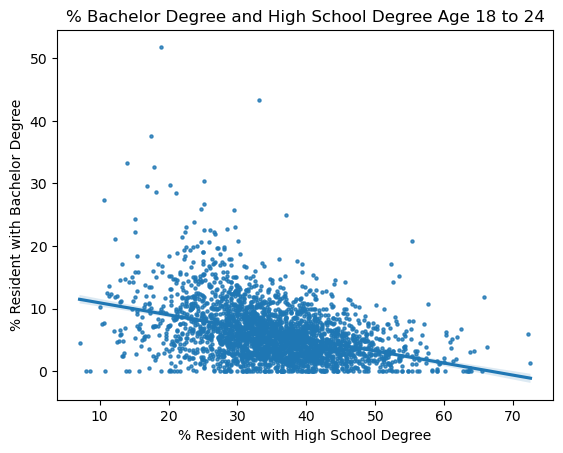

In [42]:
sns.regplot(data = merged_data_alys, x = 'pcths18_24', y = 'pctbachdeg18_24', scatter_kws = {'s': 5})
plt.ylabel('% Resident with Bachelor Degree')
plt.xlabel('% Resident with High School Degree')
plt.title('% Bachelor Degree and High School Degree Age 18 to 24')
plt.show()

A high percentage of residents with only high school degrees tends to be negatively correlated wih the percentage of residents holding bachelor's degrees.

#### Bachelor Degree and Median Income

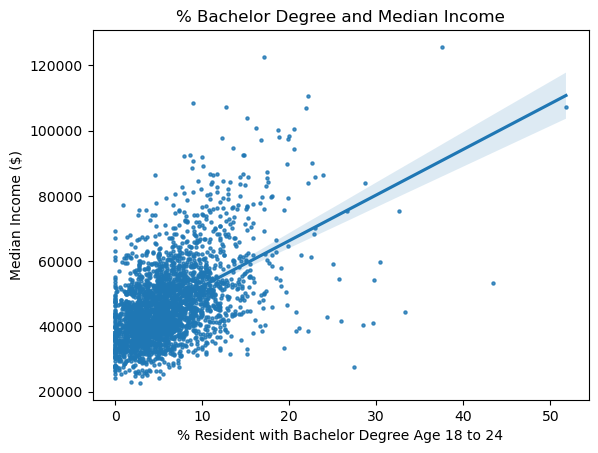

In [43]:
sns.regplot(data = merged_data_alys, x = 'pctbachdeg18_24', y = 'medincome', scatter_kws = {'s': 5})
plt.ylabel('Median Income ($)')
plt.xlabel('% Resident with Bachelor Degree Age 18 to 24')
plt.title('% Bachelor Degree and Median Income')
plt.show()

Th percentage of residents with bacehlor degrees tend to positively correlated with median income. 

#### Health Insurance Coverage Type and Income

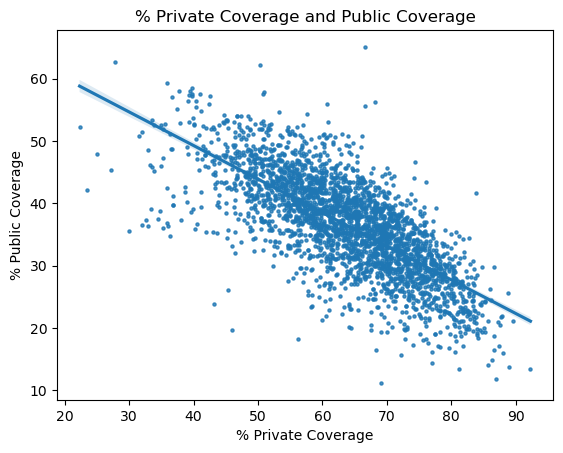

In [44]:
sns.regplot(data = merged_data_alys, x = 'pctprivatecoverage', y = 'pctpubliccoverage', scatter_kws = {'s': 5})
plt.ylabel('% Public Coverage')
plt.xlabel('% Private Coverage')
plt.title('% Private Coverage and Public Coverage')
plt.show()

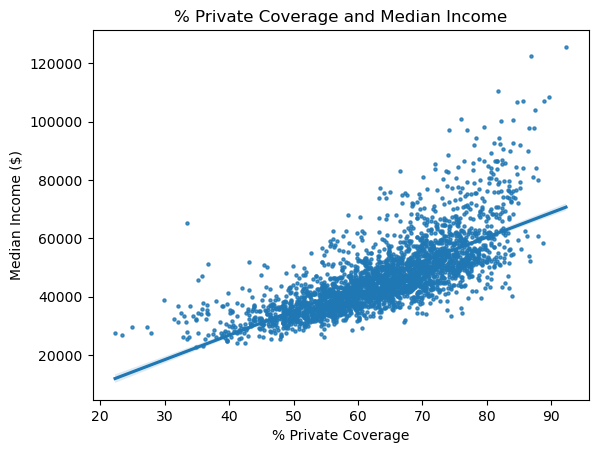

In [45]:
sns.regplot(data = merged_data_alys, x = 'pctprivatecoverage', y = 'medincome', scatter_kws = {'s': 5})
plt.ylabel('Median Income ($)')
plt.xlabel('% Private Coverage')
plt.title('% Private Coverage and Median Income')
plt.show()

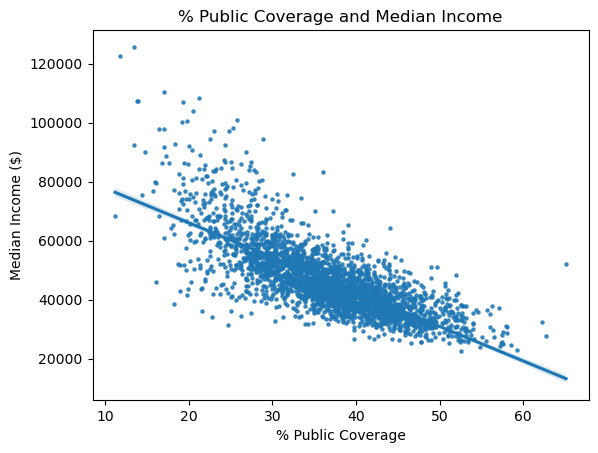

In [46]:
sns.regplot(data = merged_data_alys, x = 'pctpubliccoverage', y = 'medincome', scatter_kws = {'s': 5})
plt.ylabel('Median Income ($)')
plt.xlabel('% Public Coverage')
plt.title('% Public Coverage and Median Income')
plt.show()

The percentage of private health insurance is negatively correlated with public insurance. Having private health insurance coverage serves as a reliable indicator of moderate income level as indicated by the positive correlation between these two factors. 

#### Race and Income

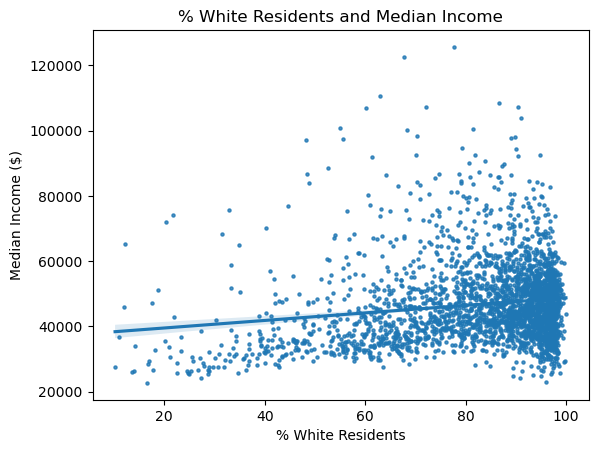

In [47]:
sns.regplot(data = merged_data_alys, x = 'pctwhite', y = 'medincome', scatter_kws = {'s': 5})
plt.ylabel('Median Income ($)')
plt.xlabel('% White Residents')
plt.title('% White Residents and Median Income')
plt.show()

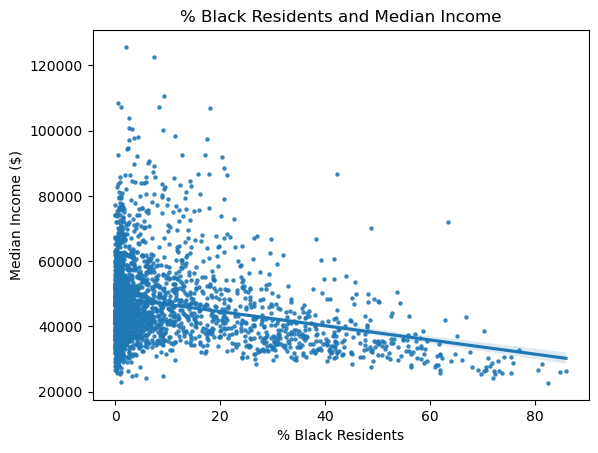

In [48]:
sns.regplot(data = merged_data_alys, x = 'pctblack', y = 'medincome', scatter_kws = {'s': 5})
plt.ylabel('Median Income ($)')
plt.xlabel('% Black Residents')
plt.title('% Black Residents and Median Income')
plt.show()

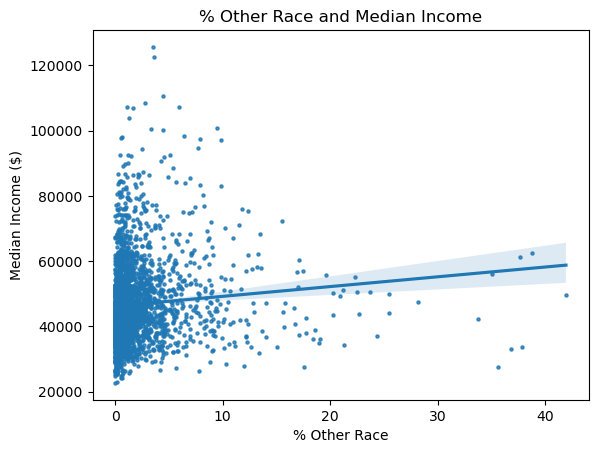

In [49]:
sns.regplot(data = merged_data_alys, x = 'pctotherrace', y = 'medincome', scatter_kws = {'s': 5})
plt.ylabel('Median Income ($)')
plt.xlabel('% Other Race')
plt.title('% Other Race and Median Income')
plt.show()

It is evident that higher proportion of white residents and other race tend to associated with higher median income, whereas high proportion of black residents tend to correlated with lower income levels. 

### Cancer Case Rate and SES

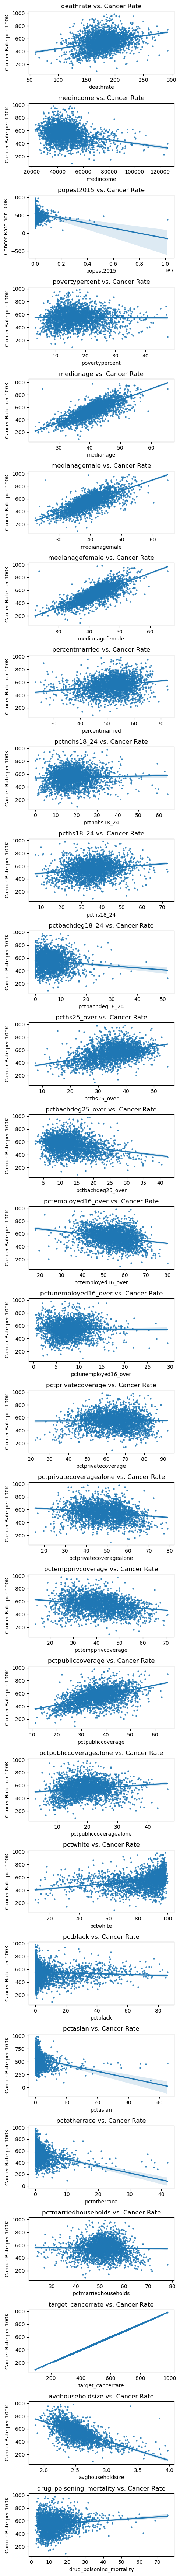

In [50]:
fig, axes = plt.subplots(nrows=len(numeric_var), ncols=1, figsize=(5, 70))

# Loop through the variables and create scatter plots
for i, variable in enumerate(numeric_var):
    sns.regplot(x=variable, y='target_cancerrate', data=merged_data_alys, ax=axes[i],
               scatter_kws = {'s': 5})
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Cancer Rate per 100K')
    axes[i].set_title(f'{variable} vs. Cancer Rate')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Based on the scatter plots, an increase in public coverage and drug poisoning mortality is associated with an increase in cancer rate, while a increase in median income, percentage of residents with bachelor's degrees, private coverage, employment, and the percentage of asian residents and other race are linked to an decrease in cancer rate. These findings pinpoint that low socioeconomic status, suggested by low income, public coverage and low education level, are associated with cancer rate. However, it is worthmentioning that unemployement rate might act as a confounding factor, due to its inclusion of retirees, who are generally older in age and more susceptible to developing cancer. 

<Figure size 640x480 with 0 Axes>

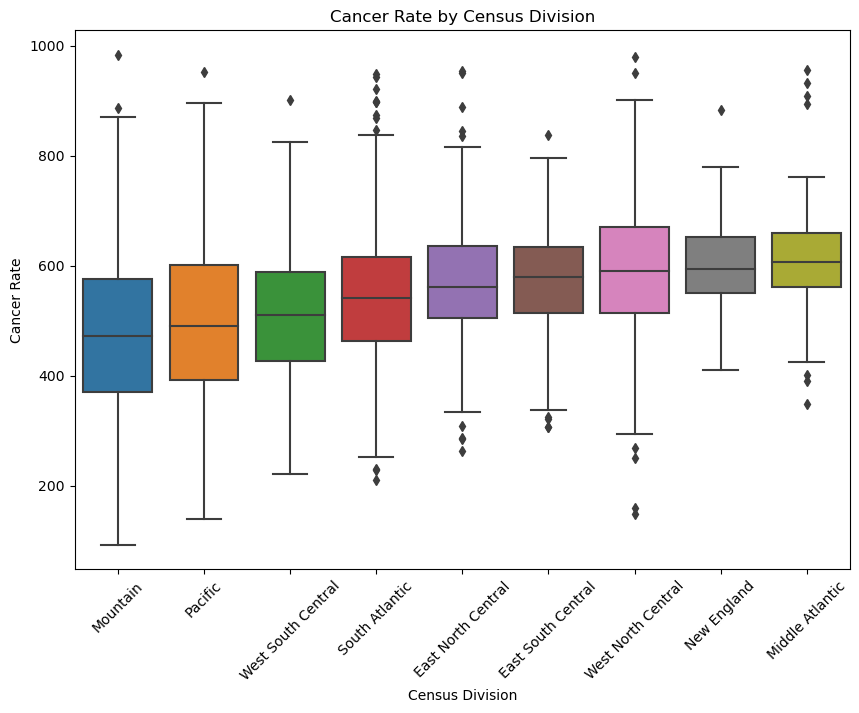

In [51]:
sorted_census = merged_data_alys.groupby(['Census Division'])['target_cancerrate'].median().sort_values()
fig = plt.figure()
fig, ax = plt.subplots(figsize = (10,7))

sns.boxplot(data = merged_data_alys, x = 'Census Division', y = 'target_cancerrate',order = list(sorted_census.index))
plt.ylabel('Cancer Rate')
plt.title('Cancer Rate by Census Division')
plt.xticks(rotation = 45)
plt.show()

<img src = 'cancerrate.png' style = "width:1200px; height:550px">

Counties with higher cancer rates were more prevalent in Northeast and Midwest and less in West.

### Drug Poisoning Mortality and SES

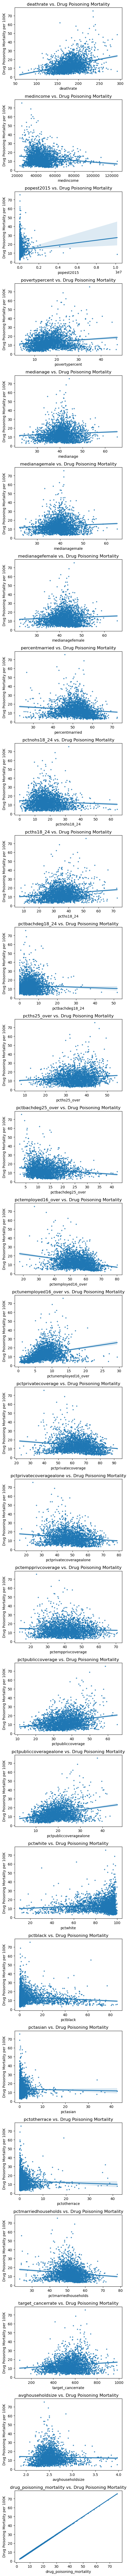

In [52]:
fig, axes = plt.subplots(nrows=len(numeric_var), ncols=1, figsize=(5, 100))

# Loop through the variables and create scatter plots
for i, variable in enumerate(numeric_var):
    sns.regplot(x=variable, y='drug_poisoning_mortality', data=merged_data_alys, ax=axes[i],
               scatter_kws = {'s': 5})
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Drug Poisoning Mortality per 100K')
    axes[i].set_title(f'{variable} vs. Drug Poisoning Mortality')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Similar to cancer case rate, drug poisoning mortality also associated with low socioeconomic status. Increase in death rate, percentage of poverty, unemployment and public coverage is linked with increase in drug poisoning mortality. Conversely, a decline in median income, percentage of married residents and households, and private coverage is associated with decrease in drug poisoning mortality. Age and race show minimal influence.

<Figure size 640x480 with 0 Axes>

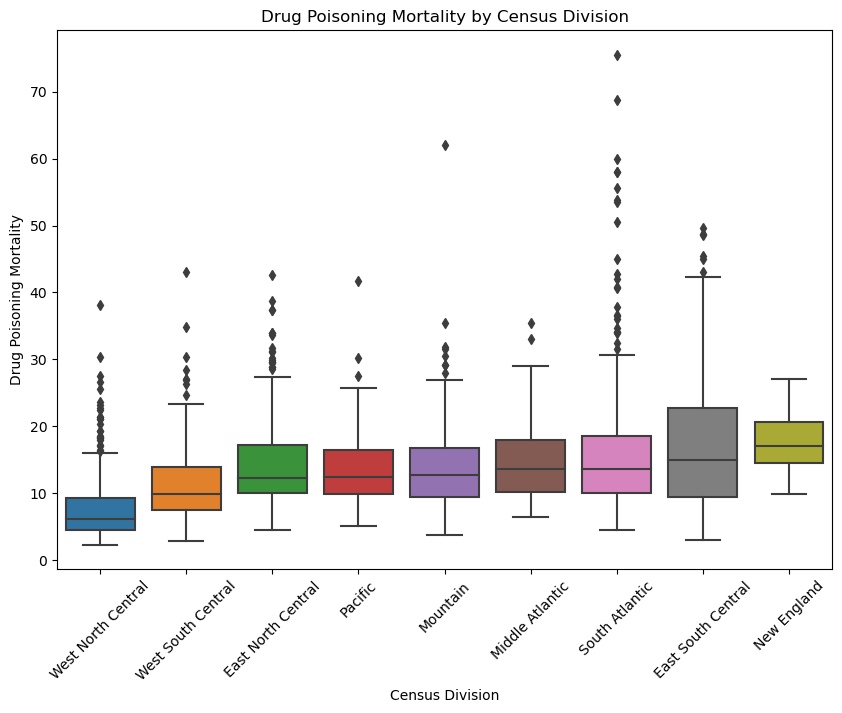

In [53]:
sorted_census = merged_data_alys.groupby(['Census Division'])['drug_poisoning_mortality'].median().sort_values()
fig = plt.figure()
fig, ax = plt.subplots(figsize = (10,7))

sns.boxplot(data = merged_data_alys, x = 'Census Division', y = 'drug_poisoning_mortality',order = list(sorted_census.index))
plt.ylabel('Drug Poisoning Mortality')
plt.title('Drug Poisoning Mortality by Census Division')
plt.xticks(rotation = 45)
plt.show()

The New England region stands out with the highest median drug poisoning mortality. The East South Central region, on the other hand, exhibits the largest interquartile range (IQR), indicating greater variability in drug mortality. While the south Atlantic region ranks fourth in terms of median rate, it is important to note that this region includes several extreme outliers.

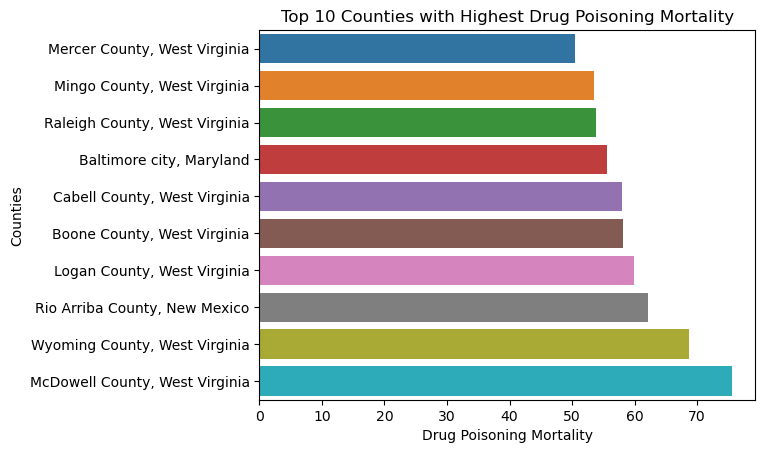

In [54]:
sns.barplot(x='drug_poisoning_mortality',y='geography',data=merged_data_alys.sort_values('drug_poisoning_mortality').tail(10))
plt.xlabel('Drug Poisoning Mortality')
plt.ylabel('Counties')
plt.title('Top 10 Counties with Highest Drug Poisoning Mortality')
plt.show()

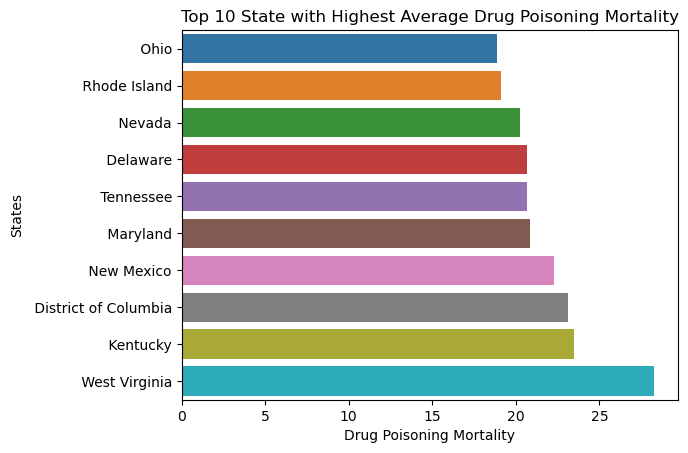

In [55]:
avg_drug_mort_state = merged_data_alys.groupby('State')['drug_poisoning_mortality'].mean().sort_values().reset_index()
sns.barplot(x='drug_poisoning_mortality',y='State',data=avg_drug_mort_state.tail(10))
plt.xlabel('Drug Poisoning Mortality')
plt.ylabel('States')
plt.title('Top 10 State with Highest Average Drug Poisoning Mortality')
plt.show()

Nine out of top 10 counties with the highest drug poisoning mortality are located in West Virginia, which also ranks the highest in average among states. Additionally, four states fall within the South Atlantic region, while two are situated in East South Central region. 

<img src = 'drug_mortl.png' style = "width:1200px; height:550px">

A clear distinctioin can be observed in a group counties South region, which includes West Virgina, Kentucky and Tennessee, with significantly high drug poisoning mortality rates. Additionally, one county in New Mexico stands out within the Mountain region with its high rate. 

### Key Takeaways from EDA:

- High % bachelor degree, % private coverage, % white and % other race are indicators of high income level, suggesting high socio-economic status (SES)
- Increase in cancer rate and drug poisoning mortality are associated with low SES, as indicated by low income, public coverage and education level
- 9 out of top 10 counties with highest drug poisoning mortality are located in West Virginia, while 4 out of top 10 states are located with South Atlantic

In [56]:
# dummify census division
census_dummies = pd.get_dummies(merged_data_alys['Census Division'])
merged_data_alys = pd.concat([merged_data_alys, census_dummies], axis = 1)
merged_data_alys.drop(columns = 'Census Division', inplace = True)

In [57]:
numeric_var = merged_data_alys.select_dtypes(exclude = 'object').columns.to_list()

In [58]:
merged_data_alys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 0 to 3017
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   deathrate                 2820 non-null   float64
 1   medincome                 2820 non-null   int64  
 2   popest2015                2820 non-null   int64  
 3   povertypercent            2820 non-null   float64
 4   medianage                 2820 non-null   float64
 5   medianagemale             2820 non-null   float64
 6   medianagefemale           2820 non-null   float64
 7   geography                 2820 non-null   object 
 8   percentmarried            2820 non-null   float64
 9   pctnohs18_24              2820 non-null   float64
 10  pcths18_24                2820 non-null   float64
 11  pctbachdeg18_24           2820 non-null   float64
 12  pcths25_over              2820 non-null   float64
 13  pctbachdeg25_over         2820 non-null   float64
 14  pctemplo

In [59]:
#convert dummified census divsions from data type 'uint8' to 'int64'
unit8_cols = merged_data_alys.select_dtypes(include = 'uint8').columns
col_int64 = merged_data_alys[unit8_cols].astype('int64')
merged_data_alys.drop(columns = unit8_cols, inplace = True )
merged_data_alys = pd.concat([merged_data_alys,col_int64], axis = 1)

In [60]:
merged_data_alys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 0 to 3017
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   deathrate                 2820 non-null   float64
 1   medincome                 2820 non-null   int64  
 2   popest2015                2820 non-null   int64  
 3   povertypercent            2820 non-null   float64
 4   medianage                 2820 non-null   float64
 5   medianagemale             2820 non-null   float64
 6   medianagefemale           2820 non-null   float64
 7   geography                 2820 non-null   object 
 8   percentmarried            2820 non-null   float64
 9   pctnohs18_24              2820 non-null   float64
 10  pcths18_24                2820 non-null   float64
 11  pctbachdeg18_24           2820 non-null   float64
 12  pcths25_over              2820 non-null   float64
 13  pctbachdeg25_over         2820 non-null   float64
 14  pctemplo

# Random Forest Feature Importance

We will use random forest regression model to identify features that are critical for clustering

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
numeric_var = merged_data_alys.select_dtypes(exclude = 'object').columns.to_list()
numeric_var

['deathrate',
 'medincome',
 'popest2015',
 'povertypercent',
 'medianage',
 'medianagemale',
 'medianagefemale',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'pctmarriedhouseholds',
 'target_cancerrate',
 'avghouseholdsize',
 'drug_poisoning_mortality',
 'East North Central',
 'East South Central',
 'Middle Atlantic',
 'Mountain',
 'New England',
 'Pacific',
 'South Atlantic',
 'West North Central',
 'West South Central']

In [63]:
numeric_var_drop_y = numeric_var.copy()
numeric_var_drop_y.remove('target_cancerrate')
numeric_var_drop_y.remove('drug_poisoning_mortality')

In [64]:
# identify feature importance in predicting cancer rate 
X = merged_data_alys[numeric_var_drop_y]
y = merged_data_alys['target_cancerrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std = pd.DataFrame(X_train_std)
X_test_std = pd.DataFrame(X_test_std)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

import numpy as np
 
importances = rf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]

dic = {'feature_label':{}, 'importance':{}}

for f in range(X_train.shape[1]):
    dic['feature_label'][f] = feat_labels[sorted_indices[f]]
    dic['importance'][f] = importances[sorted_indices[f]]

canc_feature_imp = pd.DataFrame.from_dict(dic)
canc_feature_imp

feature_label  importance
0           medianagefemale    0.480015
1                 medianage    0.139440
2                 deathrate    0.075444
3          avghouseholdsize    0.052882
4         pctpubliccoverage    0.023941
5                pcths18_24    0.018921
6              pcths25_over    0.015515
7              pctotherrace    0.015434
8      pctmarriedhouseholds    0.013616
9                popest2015    0.013554
10             pctnohs18_24    0.012759
11       pctemployed16_over    0.012730
12        pctbachdeg25_over    0.010412
13            medianagemale    0.009567
14          pctbachdeg18_24    0.009300
15                 pctasian    0.009149
16                medincome    0.009089
17                 pctwhite    0.008995
18     pctunemployed16_over    0.008848
19                 pctblack    0.008293
20           percentmarried    0.008266
21       pctprivatecoverage    0.006965
22       pctempprivcoverage    0.006452
23           povertypercent    0.006139
24  pctprivatecoveragealone    0.006058
25   pctpubliccoveragealone    0.005941
26       West North Central    0.002969
27          Middle Atlantic    0.002488
28                 Mountain    0.002060
29           South Atlantic    0.001546
30       West South Central    0.001390
31       East North Central    0.000721
32       East South Central    0.000636
33                  Pacific    0.000310
34              New England    0.000153

In [65]:
# identify feature importance in predicting drug poisoning mortality 

X = merged_data_alys[numeric_var_drop_y]
y = merged_data_alys['drug_poisoning_mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std = pd.DataFrame(X_train_std)
X_test_std = pd.DataFrame(X_test_std)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]

dic = {'feature_label':{}, 'importance':{}}

for f in range(X_train.shape[1]):
    dic['feature_label'][f] = feat_labels[sorted_indices[f]]
    dic['importance'][f] = importances[sorted_indices[f]]

drg_feature_imp = pd.DataFrame.from_dict(dic)
drg_feature_imp

feature_label  importance
0      pctunemployed16_over    0.144707
1                 deathrate    0.114605
2                popest2015    0.086981
3                  pctwhite    0.066568
4                  pctblack    0.055220
5        pctemployed16_over    0.040870
6        West North Central    0.037232
7      pctmarriedhouseholds    0.033630
8                 medincome    0.026823
9    pctpubliccoveragealone    0.026527
10             pcths25_over    0.026307
11             pctotherrace    0.026029
12        pctpubliccoverage    0.023479
13           percentmarried    0.023010
14          pctbachdeg18_24    0.022160
15         avghouseholdsize    0.021248
16          medianagefemale    0.020675
17           povertypercent    0.019566
18               pcths18_24    0.019510
19             pctnohs18_24    0.018325
20        pctbachdeg25_over    0.018117
21                 pctasian    0.016352
22       West South Central    0.015624
23       pctempprivcoverage    0.014801
24            medianagemale    0.013497
25  pctprivatecoveragealone    0.013208
26           South Atlantic    0.012770
27       pctprivatecoverage    0.011475
28       East South Central    0.011239
29                medianage    0.010544
30       East North Central    0.002642
31                 Mountain    0.002475
32              New England    0.001999
33          Middle Atlantic    0.001183
34                  Pacific    0.000601

In [66]:
#identify top features for each outcome that have > 0.01  feature importance
_canc_feature_imp = canc_feature_imp[canc_feature_imp['importance'] > 0.01]
_drg_feature_imp = drg_feature_imp[drg_feature_imp['importance'] > 0.01]
_canc_feature_imp = _canc_feature_imp['feature_label'].to_list()
_drg_feature_imp = _drg_feature_imp['feature_label'].to_list()

var_list = list(set(_canc_feature_imp + _drg_feature_imp))

var_list_len = len(var_list)
print(f"There are {var_list_len} variables selected with high feature importance.")
var_list


There are 30 variables selected with high feature importance.


['pctwhite',
 'pcths25_over',
 'pctmarriedhouseholds',
 'medincome',
 'povertypercent',
 'pctpubliccoverage',
 'pctbachdeg25_over',
 'medianage',
 'pcths18_24',
 'pctunemployed16_over',
 'avghouseholdsize',
 'pctpubliccoveragealone',
 'pctbachdeg18_24',
 'percentmarried',
 'pctblack',
 'pctasian',
 'South Atlantic',
 'popest2015',
 'pctempprivcoverage',
 'West South Central',
 'pctotherrace',
 'pctnohs18_24',
 'medianagefemale',
 'pctemployed16_over',
 'medianagemale',
 'pctprivatecoveragealone',
 'West North Central',
 'deathrate',
 'pctprivatecoverage',
 'East South Central']

In [67]:
# Create final dataset for clustering
var_list_with_outcomes = var_list + ['target_cancerrate','drug_poisoning_mortality']
for_clustering = merged_data_alys[var_list_with_outcomes]

# K-means Clustering

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

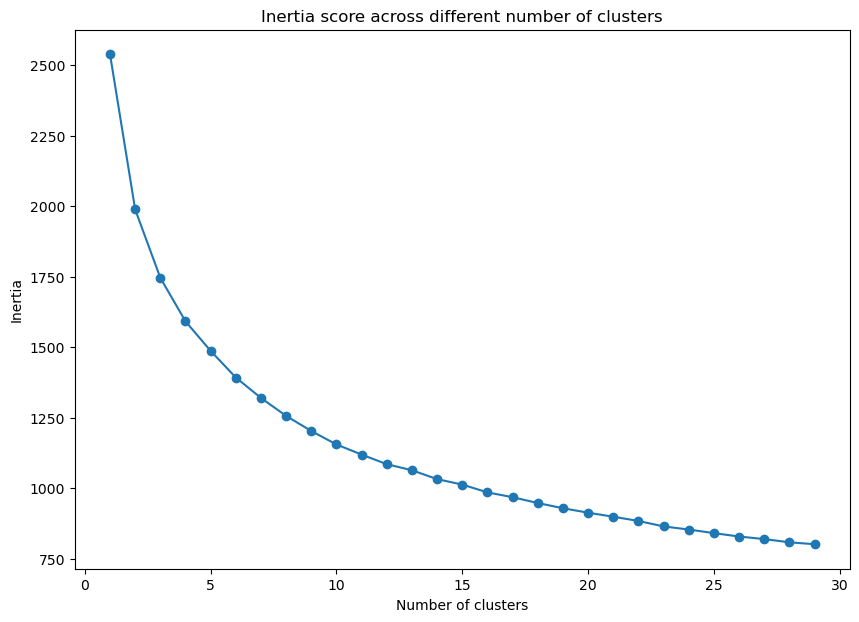

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

ss = StandardScaler()
df_scaled = ss.fit_transform(for_clustering)

normalized_df = normalize(df_scaled)
normalized_df = pd.DataFrame(normalized_df) 


pca = PCA(n_components = 0.9) 

df_principal = pca.fit_transform(normalized_df) 
df_principal = pd.DataFrame(df_principal) 

ks = range(1, 30)

inertias = []

for k in ks:

    kmeans_model = KMeans(n_clusters=k)

    kmeans_model.fit(df_principal)

    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia score across different number of clusters')
plt.show()

Elbow method is used to determine that optimal number of clusters is 6. 

In [69]:
kmeans_model = KMeans(n_clusters=6, random_state = 1234).fit(df_principal)

kmeans_labels = kmeans_model.predict(df_principal)

kmeans_labels

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 3, ..., 2, 4, 4], dtype=int32)

In [70]:
from sklearn.metrics import silhouette_score

silhouette_score(df_principal, kmeans_labels)

0.17138898595873625

In [71]:
for_clustering['cluster_labels'] = kmeans_labels

/var/folders/cx/rjt4wlwx58lc1gzyjfd5_6v40000gn/T/ipykernel_48929/2785527847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_clustering['cluster_labels'] = kmeans_labels


In [72]:
#Number of counties in each cluster group
for_clustering['cluster_labels'].value_counts()

2    603
4    599
3    496
0    461
5    375
1    286
Name: cluster_labels, dtype: int64

#### Let's explore the distributions of SES factors and health outcomes in each cluster group.

<Figure size 640x480 with 0 Axes>

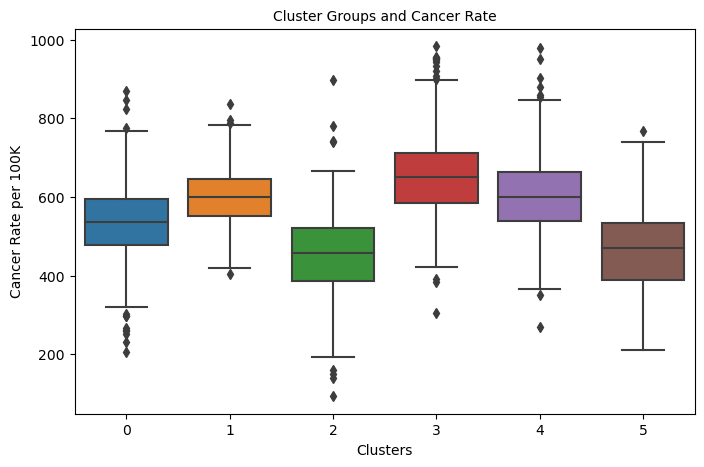

In [107]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="target_cancerrate", data=for_clustering)
plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Cancer Rate per 100K',fontsize=10)
plt.title('Cluster Groups and Cancer Rate',fontsize=10)
plt.show()

Cluster 3 has the highest median cancer rate, while cluster 2 and 5 have the lowest.

<Figure size 640x480 with 0 Axes>

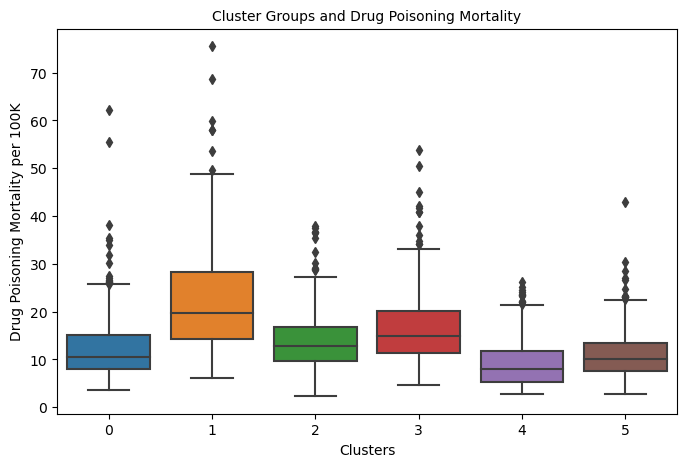

In [106]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="drug_poisoning_mortality", data=for_clustering)
plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Drug Poisoning Mortality per 100K',fontsize=10)
plt.title('Cluster Groups and Drug Poisoning Mortality',fontsize=10)
plt.show()

Cluster 2 exhibits the highest median drug poisoning mortality among all clusters, whereas cluster 4 displays the lowest. Cluster 2 also demonstrates the largest IQR, suggesting a large variation among counties within this group. 

#### Income Level

<Figure size 640x480 with 0 Axes>

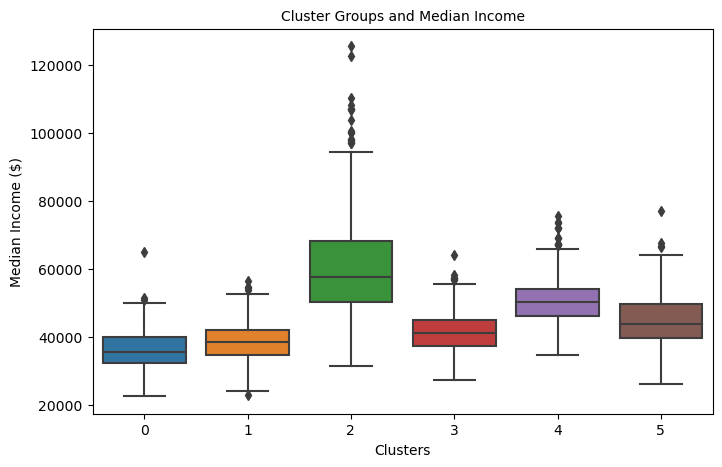

In [108]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="medincome", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Median Income ($)',fontsize=10)
plt.title('Cluster Groups and Median Income',fontsize=10)

plt.show()

Cluster 2 stands out with the highest median income, accompanied by outliers, as well as considerable interquartile range. Cluster 4 ranks the second hightest in terms of median income, whereas Cluster 0 exhibits the lowest median income. 

#### Coverage Type

<Figure size 640x480 with 0 Axes>

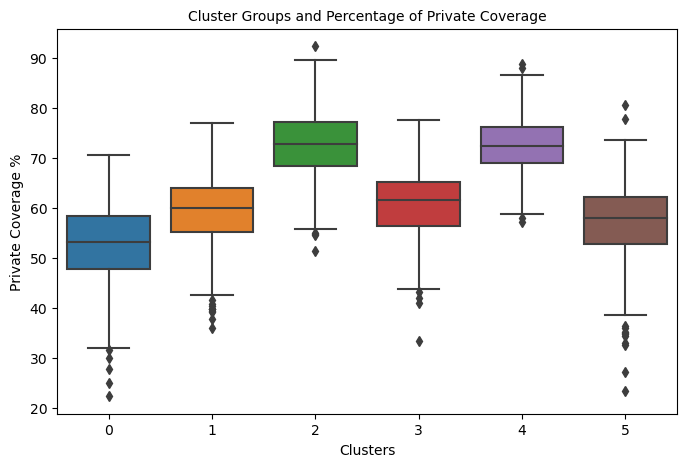

In [109]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="pctprivatecoverage", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Private Coverage %',fontsize=10)
plt.title('Cluster Groups and Percentage of Private Coverage',fontsize=10)

plt.show()

<Figure size 640x480 with 0 Axes>

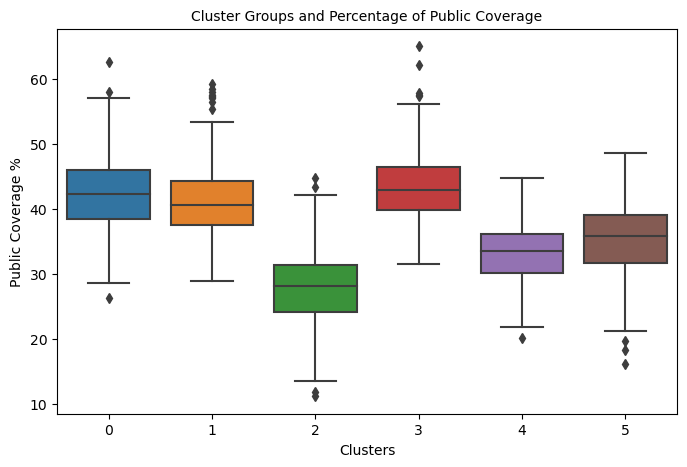

In [110]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="pctpubliccoverage", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Public Coverage %',fontsize=10)
plt.title('Cluster Groups and Percentage of Public Coverage',fontsize=10)

plt.show()

The percentage of private and public coverage in cluster groups exhibit a inverse relationship. Cluster 2 and 4 rank high in private coverage. In constrast, cluster 0 demonstrates the lowest private coverage while ranking the highest in public coverage. 

#### Age

<Figure size 640x480 with 0 Axes>

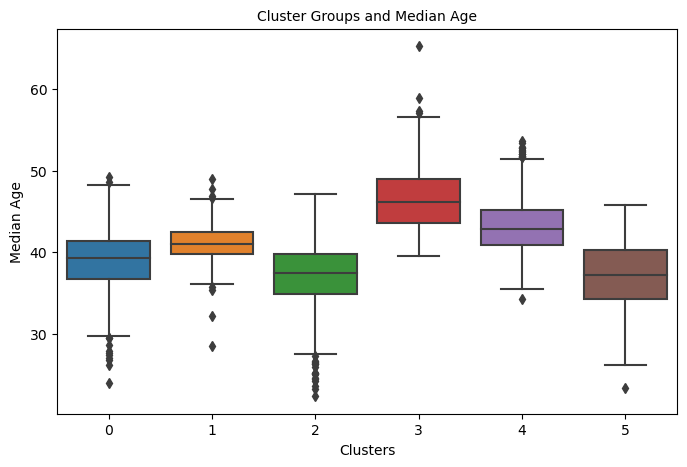

In [104]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="medianage", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Median Age',fontsize=10)
plt.title('Cluster Groups and Median Age',fontsize=10)


plt.show()

Group 3 is the oldest group, following by group 4, while group 2 emerges as the youngest. Both group 0 and 2 show a notable presence of outliers who are younger than 30 years old. 

#### Race

<Figure size 640x480 with 0 Axes>

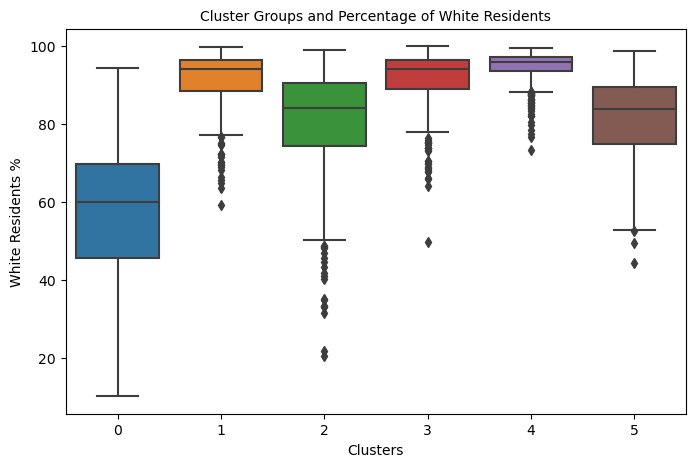

In [103]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="pctwhite", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('White Residents %',fontsize=10)
plt.title('Cluster Groups and Percentage of White Residents',fontsize=10)

plt.show()

<Figure size 640x480 with 0 Axes>

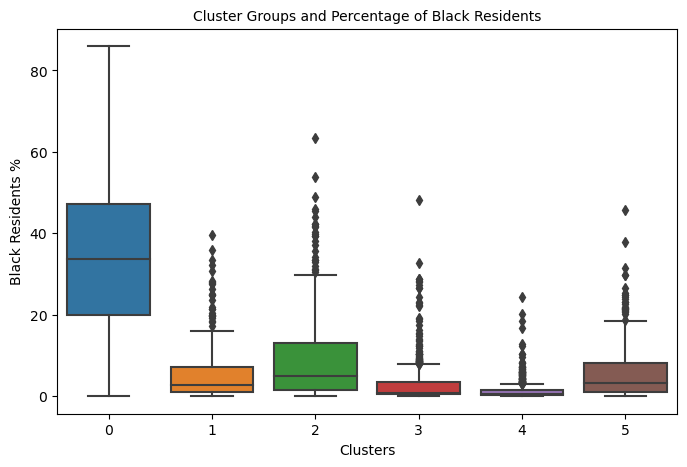

In [101]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="pctblack", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Black Residents %',fontsize=10)
plt.title('Cluster Groups and Percentage of Black Residents',fontsize=10)

plt.show()

Group 1, 3 and 4 predominately consist of white residents. Group 2 and 5 are more diverse than the fomer three groups. Group 0 has the highest percentage of black residents, indicated by a median of approximately 35%. 

#### Education Level

<Figure size 640x480 with 0 Axes>

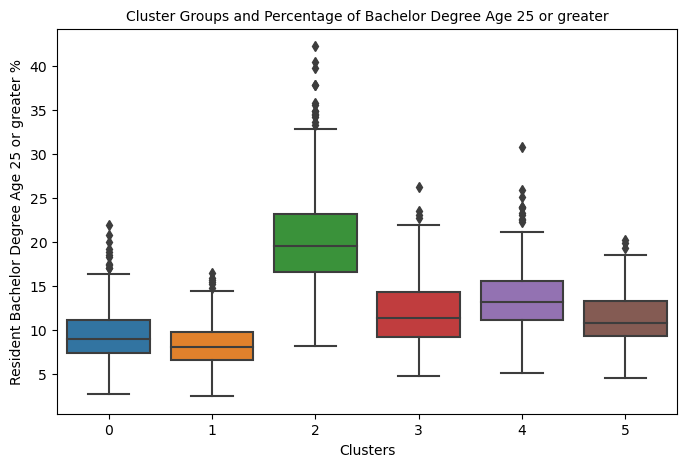

In [102]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="cluster_labels", y="pctbachdeg25_over", data=for_clustering)

plt.xlabel('Clusters',fontsize=10)
plt.ylabel('Resident Bachelor Degree Age 25 or greater %',fontsize=10)
plt.title('Cluster Groups and Percentage of Bachelor Degree Age 25 or greater',fontsize=10)

plt.show()

Group 2 has distinctively higher median in percentage of bachelor degree than the rest. 

In [86]:
cluster_0 = for_clustering[for_clustering['cluster_labels'] == 0]
cluster_1 = for_clustering[for_clustering['cluster_labels'] == 1]
cluster_2 = for_clustering[for_clustering['cluster_labels'] == 2]
cluster_3 = for_clustering[for_clustering['cluster_labels'] == 3]
cluster_4 = for_clustering[for_clustering['cluster_labels'] == 4]
cluster_5 = for_clustering[for_clustering['cluster_labels'] == 5]

In [91]:
for i in range(6):
    cluster = globals()[f"cluster_{i}"]
    mean = cluster['target_cancerrate'].mean()
    sd = cluster['target_cancerrate'].std()
    print(f"Cluster {i} Mean Cancer Rate : {mean}, Standard Deviation : {sd}")

Cluster 0 Mean Cancer Rate : 534.5345483341504, Standard Deviation : 97.55989663304643
Cluster 1 Mean Cancer Rate : 596.5264400113492, Standard Deviation : 70.85375074090331
Cluster 2 Mean Cancer Rate : 453.72873675330965, Standard Deviation : 98.90213765896608
Cluster 3 Mean Cancer Rate : 654.3811918801182, Standard Deviation : 101.73507266490242
Cluster 4 Mean Cancer Rate : 605.1050992320454, Standard Deviation : 94.38559872991591
Cluster 5 Mean Cancer Rate : 460.95189520664434, Standard Deviation : 98.41694616344918


In [92]:
for i in range(6):
    cluster = globals()[f"cluster_{i}"]
    mean = cluster['drug_poisoning_mortality'].mean()
    sd = cluster['drug_poisoning_mortality'].std()
    print(f"Cluster {i} Mean Drug Poisoning Mortality : {mean}, Standard Deviation : {sd}")

Cluster 0 Mean Drug Poisoning Mortality : 12.084282544158661, Standard Deviation : 6.410348563136019
Cluster 1 Mean Drug Poisoning Mortality : 21.95329647852148, Standard Deviation : 11.019781572303303
Cluster 2 Mean Drug Poisoning Mortality : 13.828904229024943, Standard Deviation : 5.811040699757328
Cluster 3 Mean Drug Poisoning Mortality : 16.292668358294932, Standard Deviation : 6.9415438417651645
Cluster 4 Mean Drug Poisoning Mortality : 9.277803868352015, Standard Deviation : 4.820102175871382
Cluster 5 Mean Drug Poisoning Mortality : 11.190115013333333, Standard Deviation : 5.159608769384258


### Visualizating on Map

<img src = 'Cluster_1.png' style = "width:1200px; height:550px">

Group 1, 4 and 5 show clear geographical distinction. Group 1 distinctively located in the East South Central. Group 4 concentrated in West North Central. Group 5 primarly located in West South Central and West. Group 2 consisting of counties scattered throughout the nation, most are highly urban and populated cities such as los Angeles and New York. Group 3 dispersed throughtout the central and mountain regions, whereas group 0 spreaded over the southern part of the country.

|  || Group 0 | Group 1 | Group 2 | Group 3 | Group 4 | Group 5 |
| :- | :- | :- |:- | :- | :- | :- | :- |
|  | Description| Black, Lowest SES| East South Central, Low SES| Urban, Diverse, High SES| Oldest, Low SES| White, Mid to high SES| Young, Mid SES
|  | Cancer Rate Mean(SD)| 534.5(97.6)| 596.5(70.9)| 453.7(99.0)| 654.4(102)| 605.1(94.4)| 461(98.4)
|  | Drug Poisoning Mortality Mean(SD)| 12.1(6.4)| 22.0(11.0)| 13.8(5.8)| 16.3(6.9)| 9.3(4.8)| 11.2(5.1)

### Key takeaways from the cluster groups
- Group 0 has the lowest SES with highest percentage of black residents
- Group 1 has low SES and highest average drug poisoning mortality, distinctively concentrated in East South Central region.
- Group 2 is more diverse in racial composition with high SES, primarily encompass populated cities
- Group 3 is the oldest group with low SES, associated with the highest average cancer rate
- Group 4 has high proportion of white residents with mid to high SES
- Group 5 is a young group with mid SES
- Age might play a more significant role in determining cancer rate compared to SES
- Drug poisoning mortality is prominent in low SES groups

###  National-Percentile vs Cluster-Percentile
Compute the differences between national percentile ranking and within cluster percentile ranking for cancer rate and drug poisoning mortality

In [82]:
for_clustering['cancer_pctl'] = for_clustering['target_cancerrate'].rank(pct=True) * 100
for_clustering['cancer_pctl_cluster'] = for_clustering.groupby('cluster_labels')['target_cancerrate'].rank(pct=True)* 100
for_clustering['cancer_pctl_diff'] = for_clustering['cancer_pctl_cluster'] - for_clustering['cancer_pctl'] 


for_clustering['drug_pctl'] = for_clustering['drug_poisoning_mortality'].rank(pct=True) * 100
for_clustering['drug_pctl_cluster'] = for_clustering.groupby('cluster_labels')['drug_poisoning_mortality'].rank(pct=True)* 100
for_clustering['drug_pctl_diff'] = for_clustering['drug_pctl_cluster'] - for_clustering['drug_pctl'] 

/var/folders/cx/rjt4wlwx58lc1gzyjfd5_6v40000gn/T/ipykernel_48929/1593803342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_clustering['cancer_pctl'] = for_clustering['target_cancerrate'].rank(pct=True) * 100
/var/folders/cx/rjt4wlwx58lc1gzyjfd5_6v40000gn/T/ipykernel_48929/1593803342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_clustering['cancer_pctl_cluster'] = for_clustering.groupby('cluster_labels')['target_cancerrate'].rank(pct=True)* 100
/var/folders/cx/rjt4wlwx58lc1gzyjfd5_6v40000g

In [83]:
# add in FIPS, geogprahy, state and county

for_clustering['FIPS'] = merged_data_alys['FIPS']
for_clustering['geography'] = merged_data_alys['geography']
for_clustering['State'] = merged_data_alys['State']
for_clustering['County'] = merged_data_alys['County']

/var/folders/cx/rjt4wlwx58lc1gzyjfd5_6v40000gn/T/ipykernel_48929/1615905230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_clustering['FIPS'] = merged_data_alys['FIPS']


In [85]:
#export dataset
for_clustering.to_csv('data/new_finaldata.csv')

<img src = 'change_dpm.png' style = "width:1200px; height:550px">

<img src = 'change_cc.png' style = "width:1200px; height:550px">

Counties in red are associated with increase in percentile from national-level to the cluster-level, while those in blue are associated with reduction. The changes in percentiles may be considered as a metric that signifies the severity of cancer rate and drug mortality compared to counties with similar SES makeups. 

<img src = 'change_example.png' style = "width:450px; height:250px">

For instance, Pike County in Missouri experienced an increase of 25.27% in its percentile within the cluster when compared to the national rank. This suggests a high severity of drug poisoning mortality in Pike County relative to other counties within the same cluster. 

##### Please visit the following link for visualization of county-level cancer rate and drug poisoning mortality and the cluster-adjusted change in percentile from national rank on Tableau dashboard

https://public.tableau.com/shared/WRFCY75RW?:display_count=n&:origin=viz_share_link

## Conclusion 

Findings indicate that low SES counties are more likely to experience drug mortality. Increase in cancer rates is closely associated with age. The next step in research could involve investigating the impact of SES on cancer rates with adjusted age. It is important to note that outcome prevalence rankings can be different in the cluster-level and national-level. Such differences can shed lights on the county’s specific challenges at the context of their own background and signal an opportunity for further improvement for these counties. Similar framework can be used to study other health outcomes, such as COVID-19 infection rate and mortality, as well more specific cancer types, such as colorectal cancer and cervical cancers, which can be detected at earlier stage to halt progression or preventable through vaccination. 


# Reference

•	https://nida.nih.gov/research-topics/trends-statistics/overdose-death-rates

•	https://injuryfacts.nsc.org/home-and-community/safety-topics/drugoverdoses/data-details/#:~:text=In%202021%2C%2098%2C268%20people%20died,%2C%20homicide%2C%20and%20undetermined%20intents.

•	https://www.cancercenter.com/community/blog/2023/01/why-are-cancer-rates-rising-in-adults-under-50#:~:text=Over%20the%20last%20few%20decades,in%20adults%20younger%20than%2050.

•	https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2720072#note-ZOI180280-1